In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
colors = dict(main = 'gray')

In [3]:
with sqlite3.connect('../reviews.db') as conn:
    df = pd.read_sql_query('SELECT * FROM reviews', conn)

In [4]:
df['date_of_experience'] = pd.to_datetime(df['date_of_experience'])
df['week_start'] = df['date_of_experience'].dt.to_period('W').dt.start_time

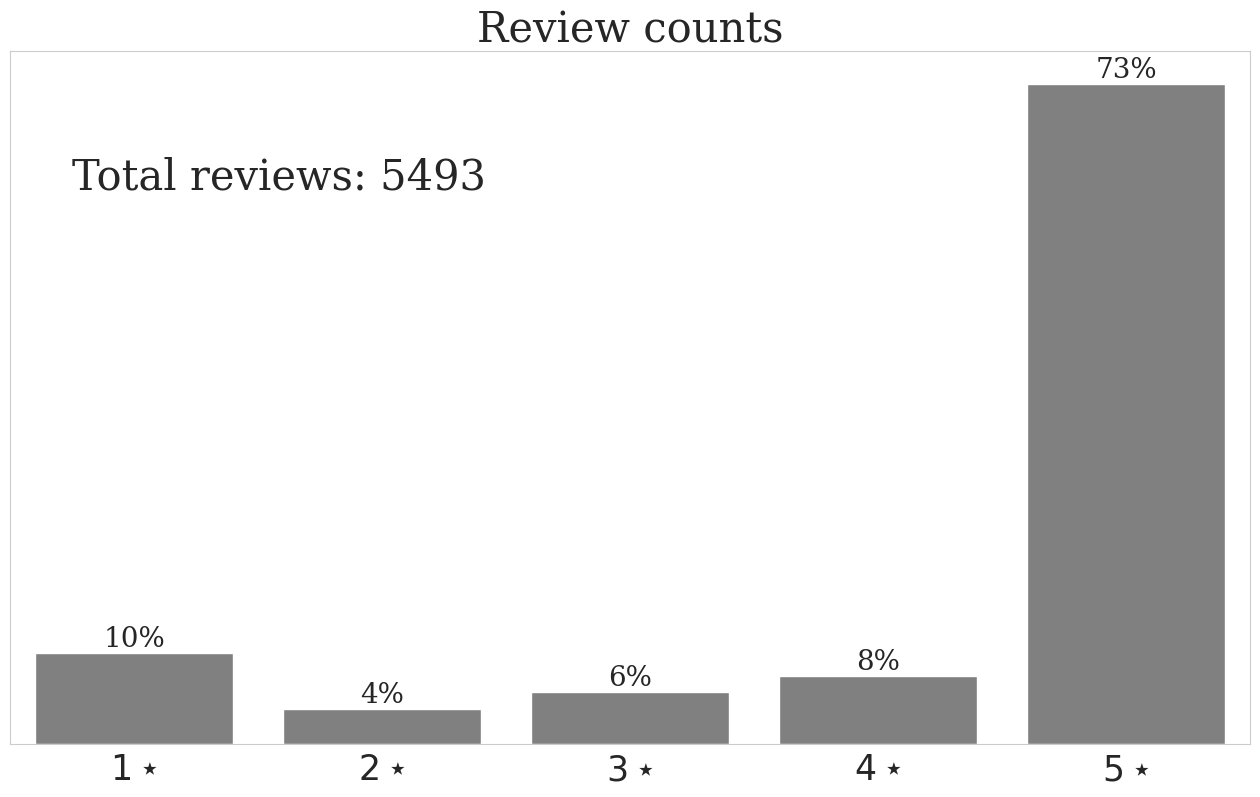

In [5]:
rate_counts_normalize = df['rate'].value_counts(normalize=True)


fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(
    x=rate_counts_normalize.index,
    y=rate_counts_normalize.values,
    ax=ax,
    color=colors['main']
)

for rate, value in rate_counts_normalize.items():
    ax.text(x=rate-1, y=value, s=f'{value:.0%}', fontsize=20, va='bottom', ha="center", fontdict=dict(family='serif'))


ax.text(x=.05, y=.8, s=f"Total reviews: {df.shape[0]}", fontsize=30, transform=ax.transAxes, fontdict=dict(family='serif'))
ax.get_yaxis().set_visible(False)
ax.tick_params(axis="x", labelsize=20)
ax.set_xticks(range(5), [
    r'$ 1 \star $',
    r'$ 2 \star $',
    r'$ 3 \star $',
    r'$ 4 \star $',
    r'$ 5 \star $'
], fontsize=25)
ax.set_title("Review counts", fontsize=30, fontdict=dict(family='serif'))
plt.show()

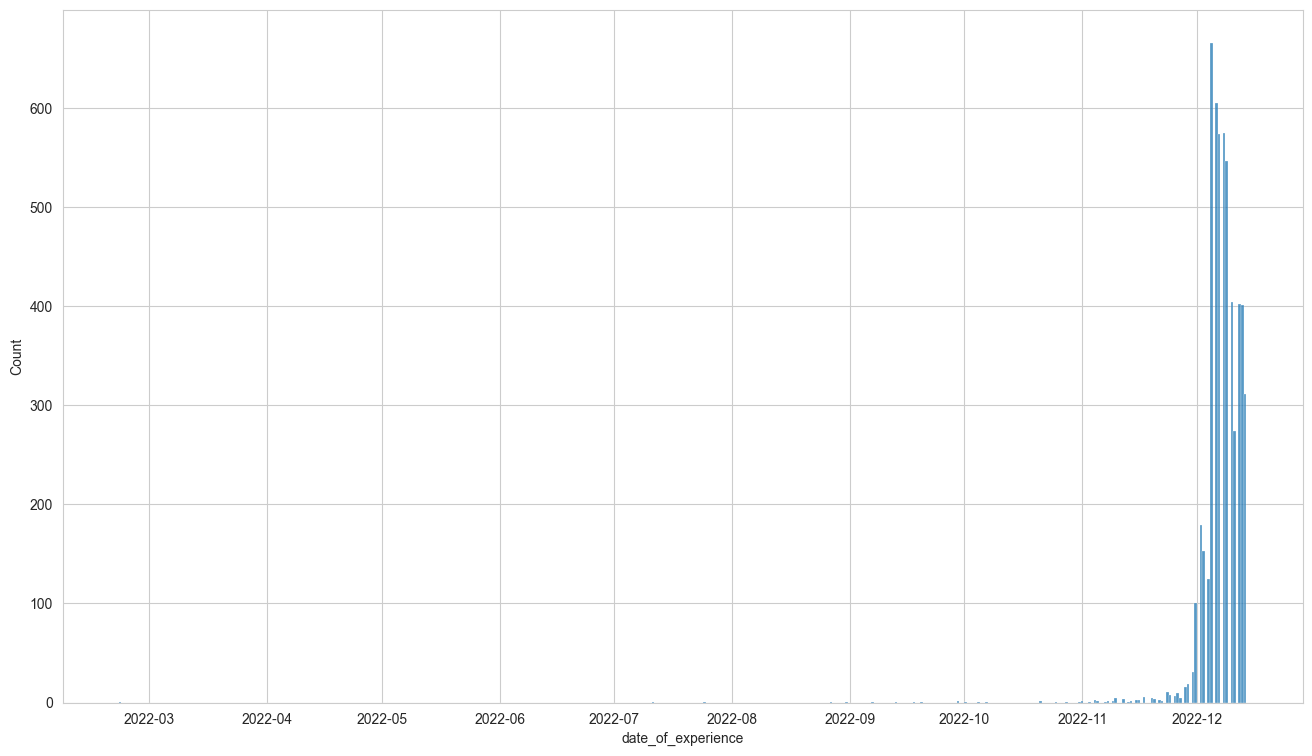

In [6]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.histplot(
    data=df,
    x='date_of_experience',
    ax=ax
)

plt.show()

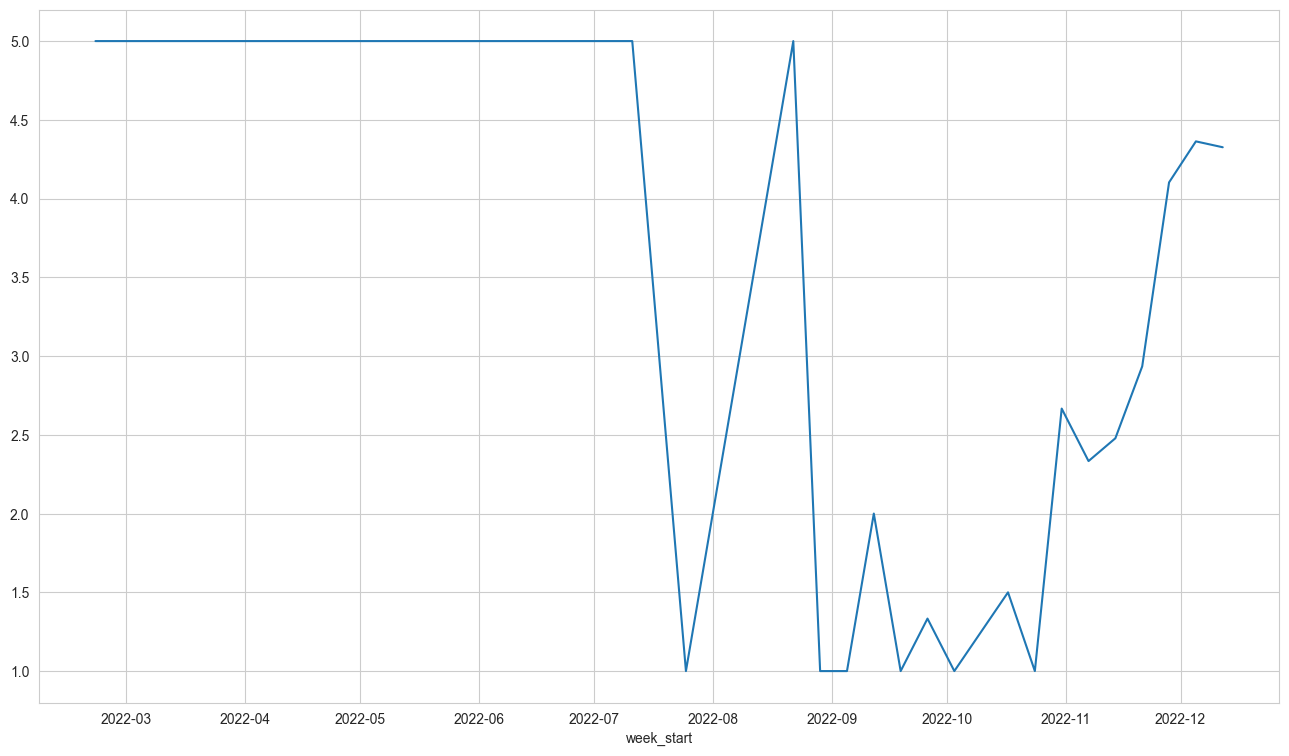

In [7]:
mean_by_week = df.groupby('week_start')['rate'].mean()

fig, ax = plt.subplots(figsize=(16, 9))

sns.lineplot(
    x=mean_by_week.index,
    y=mean_by_week.values,
    ax=ax
)

plt.show()